<a href="https://colab.research.google.com/github/THANHTRONG10052002/BAITAP1/blob/main/10Vietnamesedishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [37]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [38]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Vietnamese_Dishes/Vietnamese_Dishes/dataset',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1681 images belonging to 10 classes.


In [39]:
training.class_indices

{'banh_bo': 0,
 'banh_bot_loc': 1,
 'banh_cong': 2,
 'banh_da_lon': 3,
 'banh_khot': 4,
 'banh_mi': 5,
 'banh_tai_heo': 6,
 'banh_tieu': 7,
 'banh_trung_thu': 8,
 'banh_xeo': 9}

In [40]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [41]:
train=model.fit(training,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
53/53 [==============================] - 165s 3s/step - loss: 2.2441 - accuracy: 0.1939
Epoch 2/50
53/53 [==============================] - 141s 3s/step - loss: 1.8424 - accuracy: 0.3314
Epoch 3/50
53/53 [==============================] - 143s 3s/step - loss: 1.6333 - accuracy: 0.4200
Epoch 4/50
53/53 [==============================] - 143s 3s/step - loss: 1.5586 - accuracy: 0.4479
Epoch 5/50
53/53 [==============================] - 142s 3s/step - loss: 1.3786 - accuracy: 0.5080
Epoch 6/50
53/53 [==============================] - 141s 3s/step - loss: 1.2887 - accuracy: 0.5431
Epoch 7/50
53/53 [==============================] - 143s 3s/step - loss: 1.2483 - accuracy: 0.5574
Epoch 8/50
53/53 [==============================] - 141s 3s/step - loss: 1.1542 - accuracy: 0.6020
Epoch 9/50
53/53 [==============================] - 141s 3s/step - loss: 1.0183 - accuracy: 0.6306
Epoch 10/50
53/53 [==============================] - 141s 3s/step - loss: 0.9862 - accuracy: 0.6514
Epoch 11/

In [42]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.09739161282777786
Train Accuracy 0.9643069505691528


In [43]:
# Lưu 
model.save("/content/drive/MyDrive/Vietnamese_Dishes/Vietnamese_Dishes/dataset.h5")

In [44]:
model_1=load_model('/content/drive/MyDrive/Vietnamese_Dishes/Vietnamese_Dishes/dataset.h5')

1/1 [==============================] - 0s 69ms/step
banh_bo


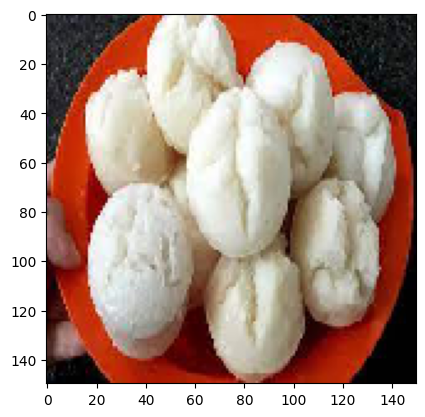

In [56]:
folder="/content/10.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 44ms/step
banh_xeo


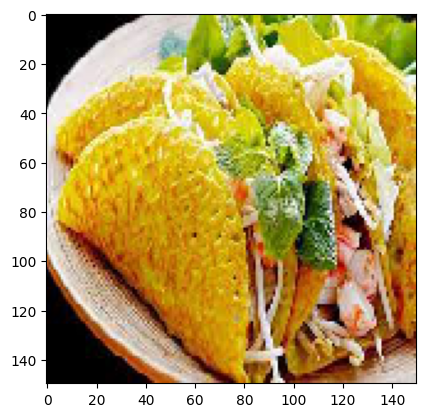

In [54]:
folder="/content/9.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 44ms/step
banh_tai_heo


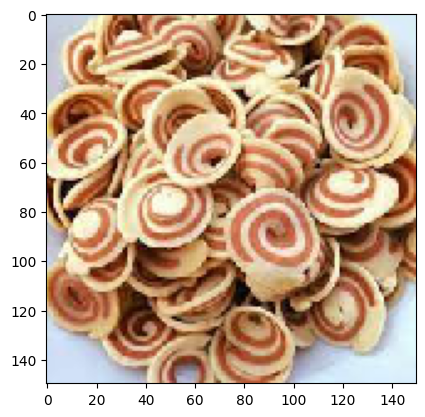

In [59]:
folder="/content/11.jpg"

img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']
print(class_name[result])
plt.show()

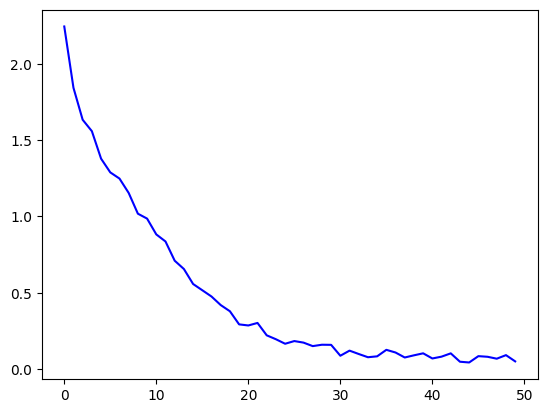

In [60]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()